In [7]:
#import libraries here
# Base
import numpy as np
import PIL
import os
from datetime import datetime
import pandas as pd


# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Display
from IPython.display import Image

# Torch
import torch
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import v2
from torch.utils.data import DataLoader, random_split, Dataset

# Other utility functions
from accelerate import Accelerator
import cv2

In [4]:
#!unzip -qq data/archive.zip -d dataset/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


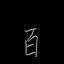

In [3]:
Image(filename=os.path.expandvars('dataset\data\data\input_1_1_12.jpg'))

In [4]:
# GAS GAS GAS 
accelerator = Accelerator(mixed_precision="fp16")
# Check the device
device = accelerator.device

print(f"The default device is set to {torch.cuda.get_device_name(device)}")

c:\Users\wwwia\Documents\Projects\htr-scanner\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The default device is set to NVIDIA GeForce RTX 3050 Ti Laptop GPU


c:\Users\wwwia\Documents\Projects\htr-scanner\.venv\Lib\site-packages\accelerate\accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [8]:
#data exploration
data = pd.read_csv('dataset\chinese_mnist.csv', delimiter=',')
data.dataframeName = 'chinese_mnist_df.csv'

data.loc[(data['suite_id'] == 100) & (data['sample_id'] == 10) & (data['code'] == 10)]

,suite_id,sample_id,code,value,character
21,100,10,10,9,九


In [19]:
#Create custom image dataset (so the images are labeled):
class charDataSet(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.labels_df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)
    
    def __getitem__(self, index):
        image_name = os.path.join(self.img_dir, 
        f"\input_{self.labels_df.iloc[index, 0]}_{self.labels_df.iloc[index, 1]}_{self.labels_df.iloc[index, 2]}.jpg")
        print(image_name)

In [21]:
dataset = charDataSet(csv_file='dataset\chinese_mnist.csv',img_dir='dataset\data\data')
dataset.__getitem__(2)

\input_1_2_10.jpg
